## 1. 패키지 불러오기

In [16]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
path = 'C:/Users/user/Desktop/16017005/Airline' #파일 경로 지정

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'Airline.csv',
 'Airline_Experiment(EDA).ipynb',
 'Airline_Experiment.ipynb',
 'Airline_Experiment_DataModeling(Categorical).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Pycaret).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Sklearn, Optuna).ipynb',
 'Airline_revised.csv',
 'Airline_revised_Numerical.csv',
 'catboost_info',
 'logs.log',
 'optuna_contour.jpg',
 'optuna_coordinate.jpg',
 'optuna_optimization_history_plot.jpg',
 'optuna_parameter_importance.jpg',
 'problem.txt',
 'Untitled.ipynb']

## 2. 파일 불러오기

In [4]:
data = pd.read_csv(path+'/Airline_revised.csv' ,engine='python',encoding='CP949')

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
data.head()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
1,3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
2,4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
3,5,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,0,0,0
4,6,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,1.0,1,1,1,0,0,0


In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
1,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
2,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
3,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,0,0,0
4,47,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,1.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103587,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103588,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103589,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103590,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


## 3. 5점체 적도 범주형 변수로 변환 (원-핫 인코딩)

In [10]:
data2 = pd.get_dummies(data = data, columns = ['Inflight wifi service'], prefix = 'Inflight wifi service', drop_first = True)
data3 = pd.get_dummies(data = data2, columns = ['Departure/Arrival time convenient'], prefix = 'Departure/Arrival time convenient', drop_first = True)
data4 = pd.get_dummies(data = data3, columns = ['Ease of Online booking'], prefix = 'Ease of Online booking', drop_first = True)
data5 = pd.get_dummies(data = data4, columns = ['Gate location'], prefix = 'Gate location', drop_first = True)
data6 = pd.get_dummies(data = data5, columns = ['Food and drink'], prefix = 'Food and drink', drop_first = True)
data7 = pd.get_dummies(data = data6, columns = ['Online boarding'], prefix = 'Online boarding', drop_first = True)
data8 = pd.get_dummies(data = data7, columns = ['Seat comfort'], prefix = 'Seat comfort', drop_first = True)
data9 = pd.get_dummies(data = data8, columns = ['Inflight entertainment'], prefix = 'Inflight entertainment', drop_first = True)
data10 = pd.get_dummies(data = data9, columns = ['On-board service'], prefix = 'On-board service', drop_first = True)
data11 = pd.get_dummies(data = data10, columns = ['Baggage handling'], prefix = 'Baggage handling', drop_first = True)
data12 = pd.get_dummies(data = data11, columns = ['Checkin service'], prefix = 'Checkin service', drop_first = True)
data13 = pd.get_dummies(data = data12, columns = ['Inflight service'], prefix = 'Inflight service', drop_first = True)
data14 = pd.get_dummies(data = data13, columns = ['Cleanliness'], prefix = 'Cleanliness', drop_first = True)


## 4. Pycaret 라이브러리 설치

In [7]:
!pip install pycaret

In [11]:
data14

,Age,Flight Distance,Leg room service,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,26,1142,3,0.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,25,562,5,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,61,214,4,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,26,1180,4,0.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,47,1276,3,1.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103587,23,192,1,1.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
103588,49,2347,5,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
103589,30,1995,2,1.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
103590,22,1000,5,0.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [12]:
from pycaret.classification import *

In [14]:
clf = setup(data = data14, target = 'satisfaction_satisfied', train_size=0.8, session_id = 123)

,Description,Value
0,session_id,123
1,Target,satisfaction_satisfied
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(103592, 74)"
5,Missing Values,False
6,Numeric Features,67
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## 5. 모형 간 성능비교

In [20]:
best = compare_models(exclude = ['ridge', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9634,0.9950,0.9439,0.9711,0.9573,0.9253,0.9256,33.0630
lightgbm,Light Gradient Boosting Machine,0.9633,0.9947,0.9404,0.9744,0.9571,0.9251,0.9256,1.0700
xgboost,Extreme Gradient Boosting,0.9623,0.9948,0.9429,0.9695,0.9560,0.9230,0.9233,16.0160
et,Extra Trees Classifier,0.9579,0.9920,0.9338,0.9683,0.9507,0.9139,0.9144,9.2140
rf,Random Forest Classifier,0.9571,0.9923,0.9302,0.9700,0.9497,0.9124,0.9130,6.6040
gbc,Gradient Boosting Classifier,0.9422,0.9873,0.9159,0.9494,0.9323,0.8819,0.8823,15.2200
dt,Decision Tree Classifier,0.9413,0.9406,0.9351,0.9304,0.9327,0.8807,0.8807,0.6600
lr,Logistic Regression,0.9320,0.9784,0.9121,0.9303,0.9210,0.8613,0.8615,13.6100
lda,Linear Discriminant Analysis,0.9308,0.9760,0.9077,0.9314,0.9194,0.8587,0.8590,1.4700
ada,Ada Boost Classifier,0.9135,0.9691,0.8882,0.9108,0.8994,0.8236,0.8238,3.1810


In [21]:
model_cat = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9616,0.9945,0.9437,0.9673,0.9553,0.9217,0.9219
1,0.9654,0.9955,0.9442,0.9754,0.9595,0.9293,0.9297
2,0.9692,0.9959,0.9564,0.9724,0.9643,0.9373,0.9374
3,0.9607,0.9945,0.9368,0.9718,0.9540,0.9196,0.9201
4,0.9665,0.9956,0.9479,0.9743,0.9609,0.9315,0.9318
5,0.9632,0.9954,0.9440,0.9706,0.9571,0.9249,0.9252
6,0.9598,0.9941,0.9362,0.9704,0.9530,0.9179,0.9184
7,0.9625,0.9950,0.9445,0.9684,0.9563,0.9234,0.9237
8,0.9616,0.9948,0.9401,0.9708,0.9552,0.9216,0.9220
9,0.9634,0.9946,0.9451,0.9701,0.9574,0.9254,0.9256


In [22]:
tuned_cat = tune_model(model_cat, n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9620,0.9948,0.9431,0.9687,0.9557,0.9224,0.9227
1,0.9649,0.9954,0.9448,0.9737,0.9590,0.9283,0.9286
2,0.9671,0.9958,0.9528,0.9709,0.9618,0.9328,0.9330
3,0.9596,0.9942,0.9326,0.9734,0.9525,0.9174,0.9180
4,0.9646,0.9952,0.9431,0.9748,0.9587,0.9278,0.9282
5,0.9643,0.9952,0.9440,0.9731,0.9583,0.9271,0.9274
6,0.9610,0.9943,0.9359,0.9735,0.9543,0.9204,0.9209
7,0.9640,0.9951,0.9445,0.9720,0.9581,0.9266,0.9269
8,0.9644,0.9947,0.9406,0.9767,0.9583,0.9273,0.9278
9,0.9620,0.9944,0.9442,0.9676,0.9558,0.9225,0.9227


In [23]:
predict_model(model_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9629,0.9950,0.9418,0.9705,0.9560,0.9240,0.9243


,Age,Flight Distance,Delay,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,...,Leg room service_4,Leg room service_5,Gender_Male_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,Customer Type_disloyal Customer_1,satisfaction_satisfied,Label,Score
0,30.0,752.0,1.0,0,0,0,1,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9780
1,55.0,802.0,0.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9990
2,56.0,3097.0,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9945
3,37.0,2942.0,1.0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9682
4,45.0,1428.0,1.0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20714,23.0,2166.0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.0000
20715,49.0,2649.0,0.0,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.6319
20716,50.0,1428.0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9972
20717,52.0,2654.0,1.0,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9834


In [24]:
predict_model(tuned_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9637,0.9948,0.9412,0.9729,0.9568,0.9255,0.9259


,Age,Flight Distance,Delay,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,...,Leg room service_4,Leg room service_5,Gender_Male_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,Customer Type_disloyal Customer_1,satisfaction_satisfied,Label,Score
0,30.0,752.0,1.0,0,0,0,1,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9762
1,55.0,802.0,0.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9963
2,56.0,3097.0,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9850
3,37.0,2942.0,1.0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9598
4,45.0,1428.0,1.0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20714,23.0,2166.0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9995
20715,49.0,2649.0,0.0,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.6165
20716,50.0,1428.0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9951
20717,52.0,2654.0,1.0,1,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9840


In [26]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

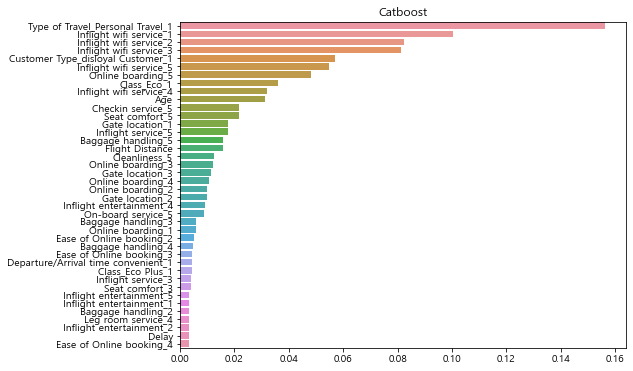

In [30]:
ft_importance_values = model_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/100, index = X_train.columns)
ft_top40 = ft_series.sort_values(ascending=False)[:40]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top40, y=ft_top40.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

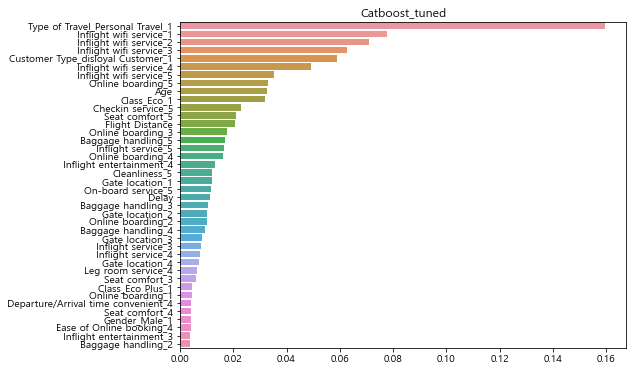

In [31]:
ft_importance_values = tuned_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values/100, index = X_train.columns)
ft_top40 = ft_series.sort_values(ascending=False)[:40]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top40, y=ft_top40.index)
plt.title('Catboost_tuned')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'